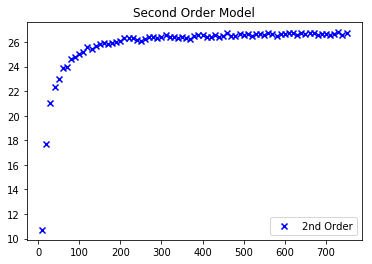

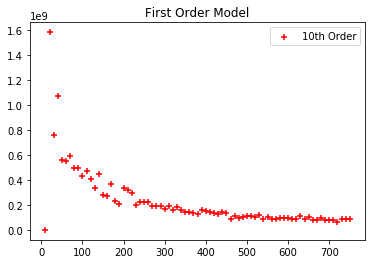

In [82]:
import matplotlib.pyplot as plt
import numpy as np
import random
from __future__ import division



def cost_estimate(target, guess):
    cost = np.sum(np.power(target-guess, 2))
    return cost


def pseudo_inverse(x, b, order):
    
    A = design_matrix(order, x)
    w = np.dot(np.linalg.inv(np.dot(A.T,A)),np.dot(A.T,b))
    y = np.dot(A, w)
    return (w, y, A)


def design_matrix(order, x):
    order += 1
    A= np.zeros([len(x), order])
    for i in range(order):
        A[:,i] = x**i
        
    return A

def sample_error(guess, target):
    error = (1/len(target)) * np.sum((guess - target)**2)
    return error


# Vary N
# In a given experiment, we observe N data points by:

const_N = 10
super_iterations = 75

learning2 = []
learning10 = []
n_array = []

for i in range(super_iterations):
    
    N = const_N * (i+1)
    
    # Delta is such that you observe N points, e.g. if delta = 0.1, you will observe (1/delta+1) = 11 data points.
    #delta = 1/(N-1)

    x = np.linspace(-0.5, 0.5, N)
    y_sin = np.sin(2*np.pi*x)
    iterations = 150
    E2_avg_out = []
    E10_avg_out = []


    # Experiment Setup
    for i in range(iterations):

        b = y_sin - 0.1 + 0.2*np.random.rand(1, N)
        b = b[0]
        # plot (x,y_sin) against (x, b)

        # Split the data 80/20 (k = N/5), into training/testing sets so that we can estimate the out-of-sample error

        split = int(N*.8)
        trainingx = x[:split]
        testingx = x[split:]
        target_training = b[:split]
        target_testing = b[split:]

        # Suppose we have two models, a second order model and a 10th order model that we fit to data with linear regression. Let y2 and y10 be the...
        # best fit hypotheses to the data from the 2nd and 10th order models. Run a large number of experiments with a fixed value of N, each time computing Eout

        # Second order model
        w2, y2, A2 = pseudo_inverse(trainingx, target_training, 2)
        #E2_in = sample_error(y2, target_training)
        A2_test = design_matrix(2, target_testing)
        y2_test = np.dot(A2_test, w2)

        E2_out = sample_error(y2_test, target_testing)
        E2_avg_out.append(E2_out)

        # Tenth order model

        w10, y10, A10 = pseudo_inverse(trainingx, target_training, 10)

        #E10_in = sample_error(y10, target_training)
        A10_test = design_matrix(10, target_testing)
        y10_test = np.dot(A10_test, w10)

        E10_out = sample_error(y10_test, target_testing)
        E10_avg_out.append(E10_out)


    # let Eout = average_over_experiments(E_out(y#))
    E2_avg = np.sum(E2_avg_out)/len(E2_avg_out)
    E10_avg = np.sum(E10_avg_out)/len(E10_avg_out)
    
    learning2.append(E2_avg)
    learning10.append(E10_avg)
    n_array.append(N)
    
    #plt.figure(0)
    #plt.scatter(range(iterations), E2_avg_out)
    #print(E2_avg)

    #plt.figure(1)
    #plt.scatter(range(iterations), E10_avg_out)
    #print(E10_avg)

plt.figure(0)
plt.scatter(n_array, learning2, c = 'blue', marker = "x" , label = "2nd Order")
plt.title("Second Order Model")
plt.legend()

plt.figure(1)
plt.scatter(n_array, learning10, c = 'red', marker = "+", label = "10th Order")
plt.title("First Order Model")
plt.legend()
plt.show()

